# importing Libraries

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download & Explore Dataset

In [2]:
imdb, metadata = tfds.load('imdb_reviews/subwords8k',
                           with_info=True,
                           as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteS6W7O9/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteS6W7O9/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteS6W7O9/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
metadata

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [4]:
print(metadata.name)

num_classes = metadata.features['label'].num_classes
print(num_classes)

imdb_reviews
2


In [5]:
class_names = metadata.features['label'].names
print(class_names)

['neg', 'pos']


In [6]:
imdb

{'test': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [7]:
train_data, test_data = imdb['train'], imdb['test']
len(train_data), len(test_data)

(25000, 25000)

# Tokenization

In [8]:
tokenizer = metadata.features['text'].encoder

In [9]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [10]:
print(len(tokenizer.subwords))

7928


In [11]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print(tokenized_string)

[6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]


In [12]:
original_string = tokenizer.decode(tokenized_string)
print(original_string)

TensorFlow, from basics to mastery


In [14]:
for token in tokenized_string:
  print(f'{token} --> {tokenizer.decode([token])}')

6307 --> Ten
2327 --> sor
4043 --> Fl
2120 --> ow
2 --> , 
48 --> from 
4249 --> basi
4429 --> cs 
7 --> to 
2652 --> master
8050 --> y


In [15]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [17]:
train_dataset = train_data.shuffle(buffer_size=BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(batch_size=BATCH_SIZE, 
                                           padded_shapes=tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(batch_size=BATCH_SIZE,
                                      padded_shapes=tf.compat.v1.data.get_output_shapes(test_data))

# Create and Train the Model

In [19]:
vocab_size = tokenizer.vocab_size
embedding_dim = 16

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 131,393
Trainable params: 131,393
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 10

history = model.fit(train_dataset, 
                    epochs=num_epochs, 
                    validation_data=test_dataset)


Epoch 1/10
391/391 [==============================] - 10s 22ms/step - loss: 0.6789 - accuracy: 0.5919 - val_loss: 0.6347 - val_accuracy: 0.7498
Epoch 2/10
391/391 [==============================] - 9s 21ms/step - loss: 0.5189 - accuracy: 0.8039 - val_loss: 0.4469 - val_accuracy: 0.8081
Epoch 3/10
391/391 [==============================] - 9s 21ms/step - loss: 0.3627 - accuracy: 0.8685 - val_loss: 0.3643 - val_accuracy: 0.8500
Epoch 4/10
391/391 [==============================] - 9s 21ms/step - loss: 0.2930 - accuracy: 0.8939 - val_loss: 0.3266 - val_accuracy: 0.8704
Epoch 5/10
391/391 [==============================] - 11s 27ms/step - loss: 0.2553 - accuracy: 0.9075 - val_loss: 0.3125 - val_accuracy: 0.8758
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 0.2292 - accuracy: 0.9190 - val_loss: 0.3078 - val_accuracy: 0.8802
Epoch 7/10
391/391 [==============================] - 9s 22ms/step - loss: 0.2123 - accuracy: 0.9225 - val_loss: 0.3053 - val_accuracy: 0.88

In [26]:
model.evaluate(test_dataset)

391/391 [==============================] - 3s 8ms/step - loss: 0.3161 - accuracy: 0.8816


[0.31613609194755554, 0.881600022315979]

# Visualize Loss & Accuracy Graph

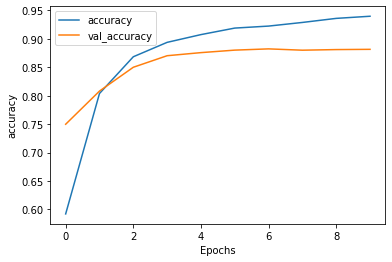

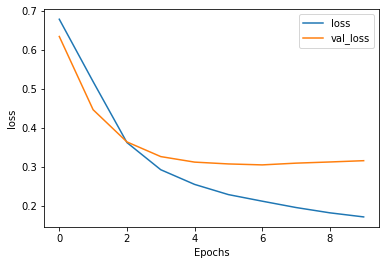

In [25]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# To visualize Embedding

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')